In [34]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
hdu= SkyView.get_images("M31","SDSSg")[0][0] # has two data 1) Head, 2)Data-could be image

In [35]:
M31_header=hdu.header
M31_Pixels=hdu.data

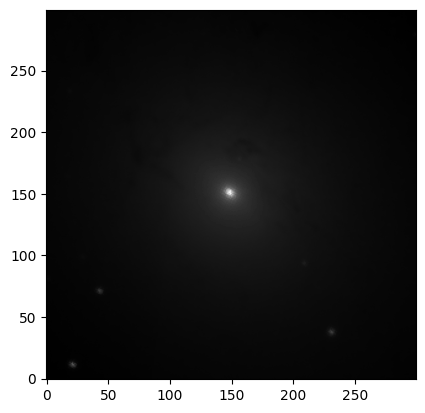

In [36]:
plt.imshow(M31_Pixels, cmap='gray', origin='lower')

In [37]:
def log_normalization(pixel_array):
    return np.log(pixel_array)

In [38]:
def plot_pixels(pixel_array, title, color):
    plt.imshow(pixel_array, cmap='gray', origin='lower')
    plt.title(title, color=color, weight='bold')
    plt.axis('off')
    plt.show()

In [39]:
def compare_pixels(original_array, scaled_array, title, color ):
    plt.subplot(1,2,1)
    plot_pixels(original_array, title='original', color='black')
    plt.subplot(1,2,2)
    plot_pixels(scaled_array, title=title, color=color)
    plt.show()

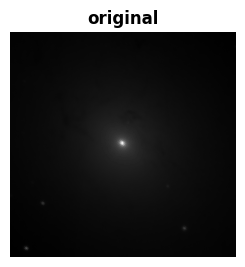

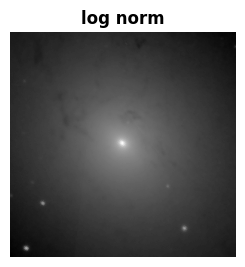

In [40]:
log_norm_array= log_normalization(M31_Pixels)
compare_pixels(M31_Pixels, log_norm_array, title='log norm', color='black')

In [41]:
from astropy.visualization import ZScaleInterval

In [42]:
z=ZScaleInterval()

In [43]:
z1, z2 = z.get_limits(log_norm_array)

In [44]:
print(f'Minimum= {z1}')
print(f'Maximun= {z2}')

Minimum= 1.6889997720718384
Maximun= 4.447910199027215


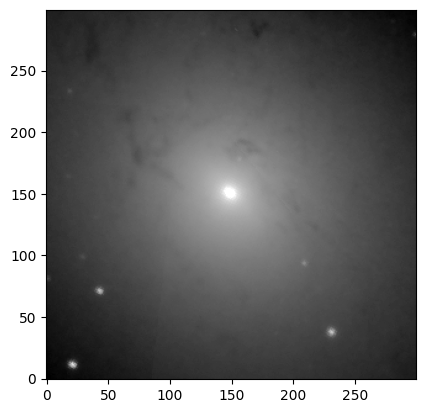

In [45]:
img=plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [46]:
image_array=img.make_image(renderer=None, unsampled=True)[0]
print(image_array)
print(image_array.shape)
print(image_array.shape) # the 4 in the output is red, green, blue, alpha (opacity)

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [ 29  29  29 255]
  [ 30  30  30 255]
  [ 29  29  29 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [ 31  31  31 255]
  [ 29  29  29 255]
  [ 29  29  29 255]]

 [[  1   1   1 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [ 29  29  29 255]
  [ 31  31  31 255]
  [ 29  29  29 255]]

 ...

 [[ 28  28  28 255]
  [ 28  28  28 255]
  [ 30  30  30 255]
  ...
  [  1   1   1 255]
  [  4   4   4 255]
  [  5   5   5 255]]

 [[ 29  29  29 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  ...
  [  4   4   4 255]
  [  4   4   4 255]
  [  2   2   2 255]]

 [[ 30  30  30 255]
  [ 30  30  30 255]
  [ 31  31  31 255]
  ...
  [  1   1   1 255]
  [  3   3   3 255]
  [  2   2   2 255]]]
(300, 300, 4)
(300, 300, 4)


In [47]:
import cv2

In [48]:
# conver 4 channel to grayscle
gray_array= cv2.cvtColor(image_array,cv2.COLOR_BGRA2GRAY)
print(gray_array.shape)

(300, 300)


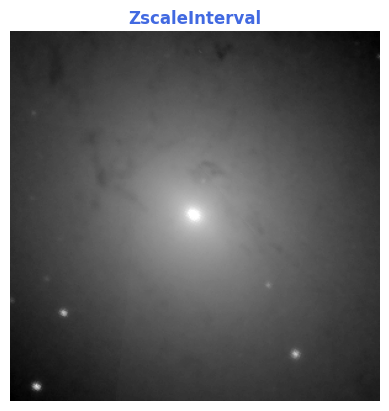

In [49]:
plot_pixels(gray_array,title='ZscaleInterval', color='royalblue')

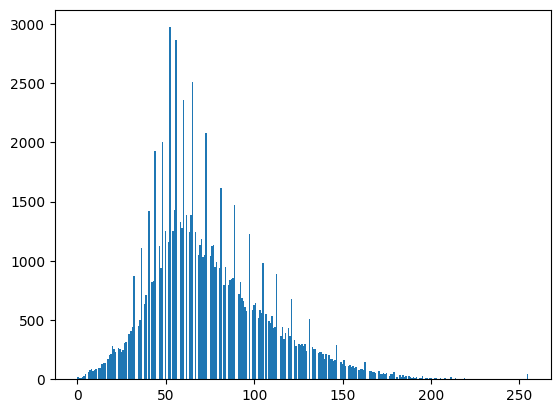

In [50]:
plt.hist(gray_array.flat, bins=300)
plt.show()